## Import Libraries

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import os 
import matplotlib.image as mpimg
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import load_img, img_to_array
import pathlib
import numpy as np
import PIL

## Load train and test path

In [6]:
# In train 22 fruits categories each category contain 450+ images
train_path = "/additional_drive1/hh/Fruits-Classification/fruits-360/Training/"

# In test 22 fruits categories and each category contain 143+ images 
test_path = "/additional_drive1/hh/Fruits-classification/fruits-360/Test/"

## Getting class names from the directory

In [7]:
# Setting the data directory path using the pathlib module
data_dir = pathlib.Path(train_path) 

# Retrieving the names of classes from the data directory and sorting them alphabetically
class_name = np.array(sorted([item.name for item in data_dir.glob('*')])) 

# Removing the first two elements from the sorted class names, assuming they are non-class items
class_names = class_name[2::]

# Printing the class names
print(class_names)

['Apple Braeburn' 'Apricot' 'Avocado' 'Banana' 'Cantaloupe 1' 'Cherry 1'
 'Cocos' 'Dates' 'Grape White' 'Grapefruit White' 'Guava' 'Huckleberry'
 'Kiwi' 'Lemon' 'Mango' 'Orange' 'Papaya' 'Peach' 'Pineapple'
 'Pineapple Mini' 'Pomegranate' 'Strawberry']


## Plot a grid of images from a training dataset

In [8]:
def view_random_image(target_dir, target_class):
    """
    Function to view a random image from a specified target directory and class.

    Args:
        target_dir (str): Path to the directory containing the images.
        target_class (str): Name of the target class for which the random image will be displayed.

    Returns:
        img: The image object.
    """

    # Setup target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    return img

## Display All fruits categories

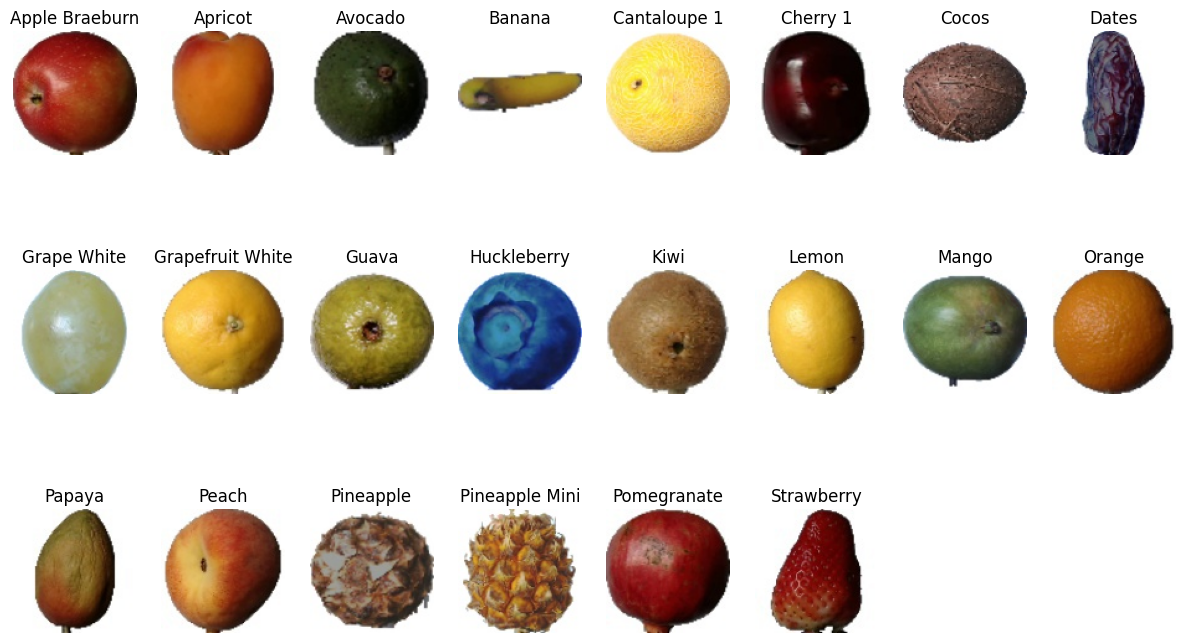

In [9]:
plt.figure(figsize=(15, 15))  # Creating a new figure with specified size

# View a random image from the training dataset for all classes
for i in range(22):
    plt.subplot(5, 8, i + 1)  # Creating subplots in a 5x8 grid
    img = view_random_image(target_dir=train_path,
                            target_class=class_names[i])  # Viewing a random image for each class


## Perform Exploratory Data Analysis (EDA)

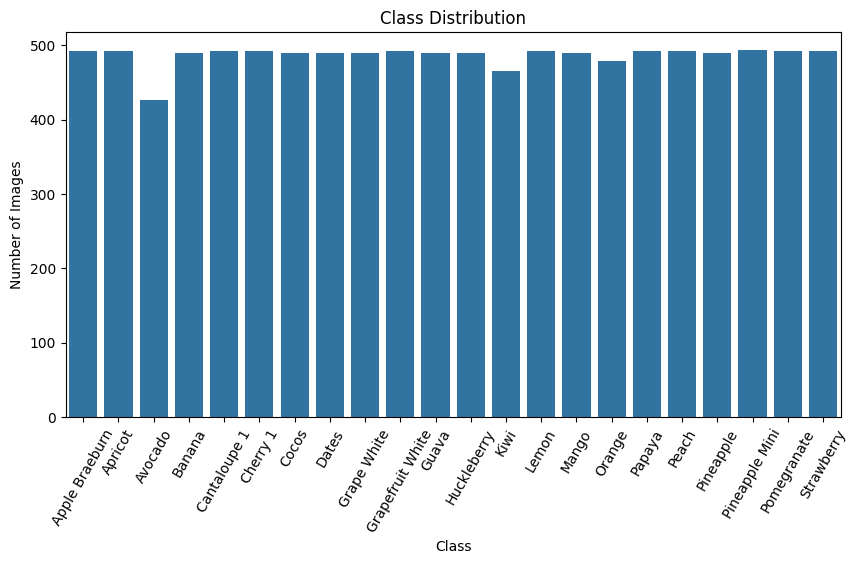

In [10]:
# Initialize an empty list to store the counts
class_counts = []

# Iterate over each class
for cls in class_names:
    # Construct the path to the directory containing images for the current class
    class_path = pathlib.Path(train_path) / cls
    # Use glob to find all files with the ".jpg" extension in the class directory
    images = list(class_path.glob("*.jpg"))
    # Append the count of images for the current class to class_counts
    class_counts.append(len(images))

# Plot class distribution

# Creating a new figure with specified size
plt.figure(figsize=(10, 5))

# Creating a bar plot
sns.barplot(x=class_names, y=class_counts)

# Rotating x-axis labels for better readability
plt.xticks(rotation=60)

# Setting x-axis label
plt.xlabel('Class')

# Setting y-axis label
plt.ylabel('Number of Images')

# Setting plot title
plt.title('Class Distribution')

# Displaying the plot
plt.show()  

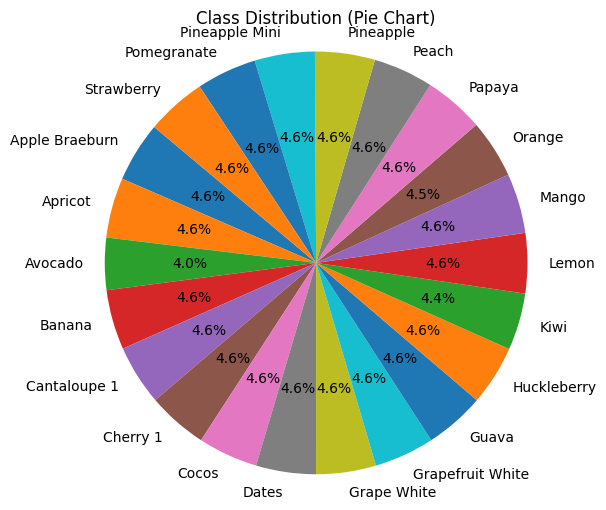

In [11]:
# Calculate class counts
class_counts = []
for cls in class_names:
    class_path = pathlib.Path(train_path) / cls
    images = list(class_path.glob("*.jpg"))
    class_counts.append(len(images))

# Plot class distribution - Pie chart

# Set the figure size for the plot
plt.figure(figsize=(6, 6))

# Create the pie chart
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Set the title for the plot
plt.title('Class Distribution (Pie Chart)')

# Display the plot
plt.show()  

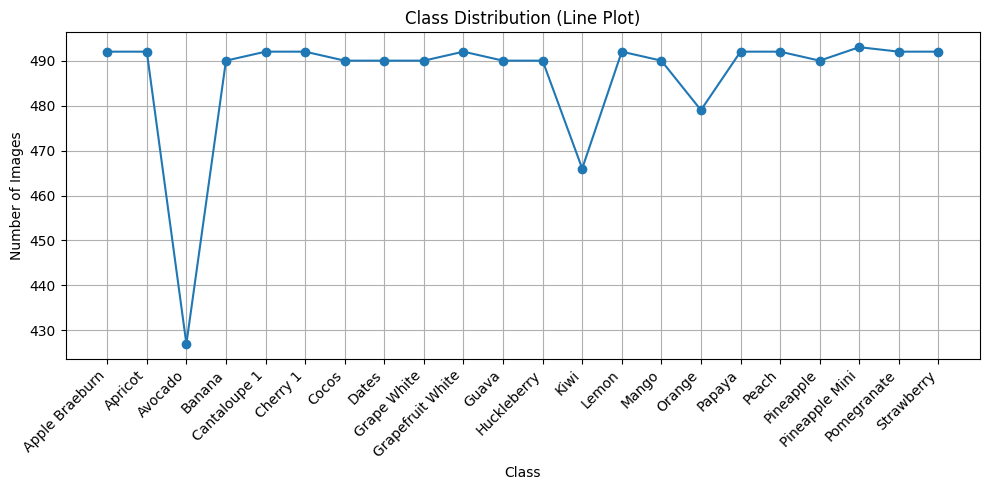

In [12]:
# Plot class distribution - Line plot

# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create the line plot
plt.plot(class_names, class_counts, marker='o')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the label for the x-axis
plt.xlabel('Class')

# Set the label for the y-axis
plt.ylabel('Number of Images')

# Set the title for the plot
plt.title('Class Distribution (Line Plot)')

# Show grid lines
plt.grid(True)

# Adjust layout to prevent overlap of labels
plt.tight_layout() 

# Display the plot
plt.show()  

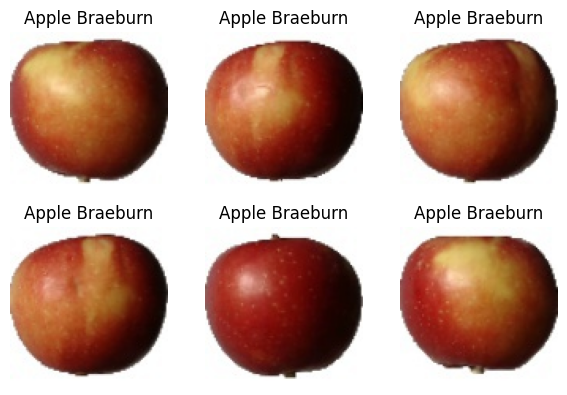

In [13]:
# Set the training directory path using pathlib
train_dir_pathlib = pathlib.Path(train_path)  

# List images in the "Apple Braeburn" class directory
fruits = list(train_dir_pathlib.glob("Apple Braeburn/*.jpg"))  

# Decrease the figure size
plt.figure(figsize=(6, 6))  

# Create subplots in a 3x3 grid
for i in range(6):
    plt.subplot(3, 3, i + 1)  
    
    # Open image using PIL
    img = PIL.Image.open(str(fruits[i]))  
    
    # Display the image
    plt.imshow(img)  
    
    # Set the title as the class label
    plt.title("Apple Braeburn")  
    
    # Turn off axis labels
    plt.axis('off')  

# Adjust layout to prevent overlap of labels
plt.tight_layout()  

# Display the plot
plt.show()  

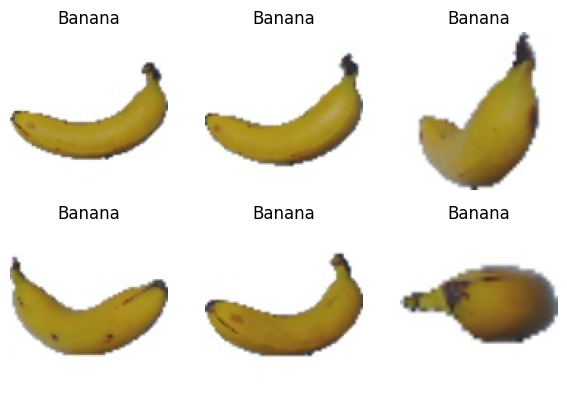

In [14]:
# Set the training directory path using pathlib
tarin_dir_pathlib = pathlib.Path(train_path)

# List images in the "Banana" class directory
fruits = list(tarin_dir_pathlib.glob("Banana/*.jpg"))

# Decrease the figure size
plt.figure(figsize=(6, 6))

# Create subplots in a 3x3 grid
for i in range(6):
    plt.subplot(3, 3, i + 1)
    
    # Open image using PIL
    img = PIL.Image.open(str(fruits[i]))
    
    # Display the image
    plt.imshow(img)
    
    # Set the title as the class label
    plt.title("Banana")
    
    # Turn off axis labels
    plt.axis('off')

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Display the plot
plt.show()

## Data Preprocess and Augmentation

### With these added parameters in the ImageDataGenerator, the data augmentation will include:
Random rotation of images up to 20 degrees.

Random zooming inside pictures up to 10%.

Random horizontal flipping of images.

The fill_mode parameter specifies how newly created pixels are filled.

In [15]:
# Define augmentation parameters
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,  # Random rotation within the range of [-20, 20] degrees
    shear_range=0.2,  # Shear transformation with a maximum shear angle of 0.2 radians
    zoom_range=0.1,  # Random zoom in/out with a range of [-10%, 10%]
    horizontal_flip=True,  # Random horizontal flipping
    fill_mode='nearest'  # Filling mode for points outside the boundaries
)

IMAGE_SIZE = 224  # Set the target image size
BATCH_SIZE = 64  # Set the batch size for training

# Train generator for train folder
train_generator = datagen.flow_from_directory(
    "/additional_drive1/hh/Fruits-Classification/fruits-360/Training/",  # Training data directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to target size
    class_mode="categorical",  # Use categorical labels
    color_mode="rgb",  # Use RGB color mode
    batch_size=BATCH_SIZE  # Set the batch size
)

# Test generator for test folder
test_generator = datagen.flow_from_directory(
    "/additional_drive1/hh/Fruits-Classification/fruits-360/Test/",  # Test data directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to target size
    class_mode="categorical",  # Use categorical labels
    color_mode="rgb",  # Use RGB color mode
    batch_size=BATCH_SIZE  # Set the batch size
)


Found 10705 images belonging to 23 classes.
Found 3146 images belonging to 23 classes.


## Display Some images after Data preprocessing and augmentatio

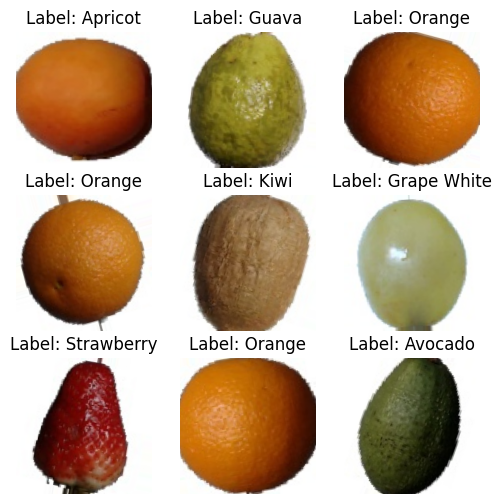

In [16]:
# Get a batch of images and labels from the training generator
images, one_hot_labels = train_generator.next()

# Convert one-hot encoded labels to class names
class_names = list(train_generator.class_indices.keys())
labels = [class_names[idx] for idx in one_hot_labels.argmax(axis=1)]

# Ensure that the images are properly normalized to the range [0, 1]
images = images / 255.0

# Display the first 9 images from the batch
plt.figure(figsize=(6, 6))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    
    # Ensure that the image is displayed in the correct color space (RGB)
    plt.imshow(images[i])
    
    # Ensure that the label is displayed correctly
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()

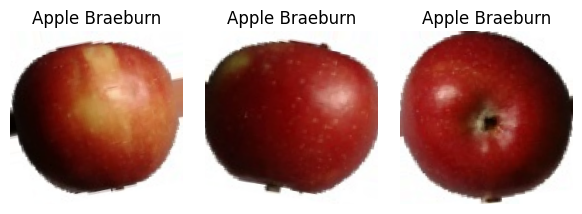

In [17]:
# Choose the category you want to display
category_to_display = 'Apple Braeburn'  # Replace with the actual category name

# Get a batch of images and labels from the training generator
images, one_hot_labels = train_generator.next()

# Convert one-hot encoded labels to class names
class_names = list(train_generator.class_indices.keys())
labels = [class_names[idx] for idx in one_hot_labels.argmax(axis=1)]

# Ensure that the images are properly normalized to the range [0, 1]
images = images / 255.0

# Display 9 images from the selected category
plt.figure(figsize=(6, 6))
num_images_displayed = 0
for i in range(len(images)):
    if labels[i] == category_to_display:
        ax = plt.subplot(3, 3, num_images_displayed + 1)
        plt.imshow(images[i])
        plt.title("Apple Braeburn")
        plt.axis("off")
        num_images_displayed += 1
        if num_images_displayed == 9:
            break

plt.tight_layout()
plt.show()

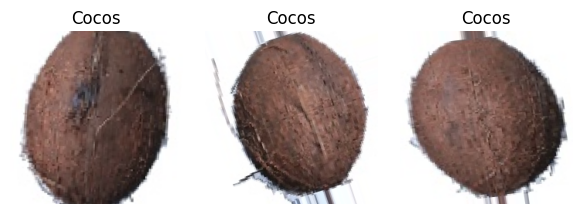

In [18]:
# Choose the category you want to display
category_to_display = 'Cocos'  # Replace with the actual category name

# Get a batch of images and labels from the training generator
images, one_hot_labels = train_generator.next()

# Convert one-hot encoded labels to class names
class_names = list(train_generator.class_indices.keys())
labels = [class_names[idx] for idx in one_hot_labels.argmax(axis=1)]

# Ensure that the images are properly normalized to the range [0, 1]
images = images / 255.0

# Display 9 images from the selected category
plt.figure(figsize=(6, 6))
num_images_displayed = 0
for i in range(len(images)):
    if labels[i] == category_to_display:
        ax = plt.subplot(3, 3, num_images_displayed + 1)
        plt.imshow(images[i])
        plt.title("Cocos")
        plt.axis("off")
        num_images_displayed += 1
        if num_images_displayed == 9:
            break

plt.tight_layout()
plt.show()

## Building CNN Model

In [20]:
from keras.models import Sequential  # Import Sequential model from Keras
from keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense  # Import layers from Keras

model = Sequential()  # Create a Sequential model

# Add a 2D convolutional layer with 32 filters, kernel size (3,3), and input shape of (IMAGE_SIZE, IMAGE_SIZE, 3)
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))

# Add ReLU activation function
model.add(Activation("relu"))

# Add a MaxPooling layer
model.add(MaxPool2D())

# Add another 2D convolutional layer with 32 filters and kernel size (3,3)
model.add(Conv2D(32, (3, 3)))

# Add ReLU activation function
model.add(Activation("relu"))

# Add a MaxPooling layer
model.add(MaxPool2D())

# Add another 2D convolutional layer with 64 filters and kernel size (3,3)
model.add(Conv2D(64, (3, 3)))

# Add ReLU activation function
model.add(Activation("relu"))

# Add a MaxPooling layer
model.add(MaxPool2D())

# Flatten the output of the previous layer
model.add(Flatten())

# Add a fully connected layer with 1024 units
model.add(Dense(1024))

# Add ReLU activation function
model.add(Activation("relu"))

# Add dropout regularization with a dropout rate of 0.5
model.add(Dropout(0.5))

# Output layer with 23 units for 23 classes
model.add(Dense(23))

# Add softmax activation function for multi-class classification
model.add(Activation("softmax"))

In [21]:
# Compile the model with categorical crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])  

# Display a summary of the model architecture
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                 

In [22]:
# Train the model
train_history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=15,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/15
168/168 [==============================] - 225s 1s/step - loss: 27.8041 - accuracy: 0.4245 - val_loss: 1.4241 - val_accuracy: 0.6570
Epoch 2/15
168/168 [==============================] - 225s 1s/step - loss: 6.1996 - accuracy: 0.6199 - val_loss: 1.1933 - val_accuracy: 0.6850
Epoch 3/15
168/168 [==============================] - 224s 1s/step - loss: 12.1207 - accuracy: 0.6805 - val_loss: 0.9110 - val_accuracy: 0.8738
Epoch 4/15
168/168 [==============================] - 225s 1s/step - loss: 10.9493 - accuracy: 0.7378 - val_loss: 1.4397 - val_accuracy: 0.8414
Epoch 5/15
168/168 [==============================] - 224s 1s/step - loss: 5.1305 - accuracy: 0.8220 - val_loss: 0.9622 - val_accuracy: 0.8814
Epoch 6/15
168/168 [==============================] - 223s 1s/step - loss: 2.8980 - accuracy: 0.8651 - val_loss: 0.5758 - val_accuracy: 0.9221
Epoch 7/15
168/168 [==============================] - 223s 1s/step - loss: 2.6134 - accuracy: 0.8726 - val_loss: 1.3630 - val_accuracy: 0.8

## Save Model

In [23]:
model.save('22-fruits-model.h5')

/var/anaconda3/envs/hamza/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Calculating Accuracy of Model Achieved on Validation Set

In [24]:
print("Validation Set Accuracy: {} %" .format(train_history.history['val_accuracy'][-1]*100))

print("Training Set Accuracy: {} %" .format(train_history.history['accuracy'][-1]*100))

Validation Set Accuracy: 98.53782653808594 %
Training Set Accuracy: 96.16067409515381 %


## Training Visualization

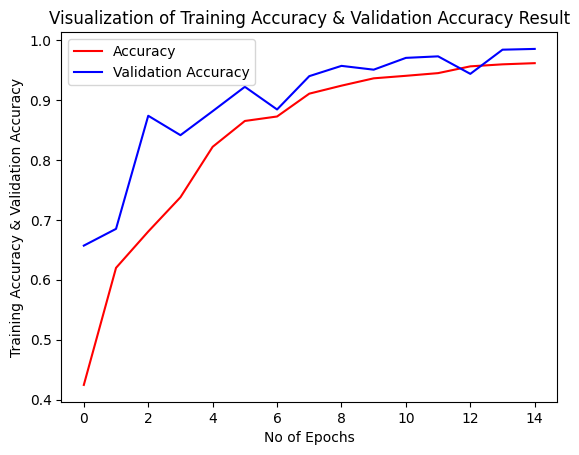

In [25]:
epochs=[i for i in range (1,10)]
plt.plot(train_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(train_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend()
plt.show()

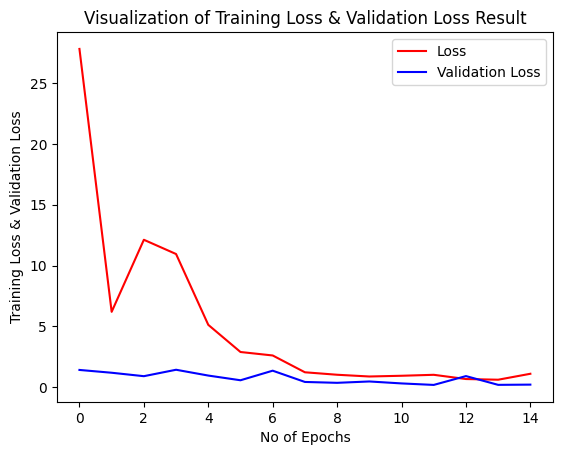

In [27]:
plt.plot(train_history.history['loss'],color='red',label='Loss')
plt.plot(train_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend()
plt.show()

## Evaluation

In [28]:
loss,accuracy=model.evaluate(train_generator)

168/168 [==============================] - 95s 566ms/step - loss: 0.0582 - accuracy: 0.9925


In [29]:
val_loss,val_accuracy=model.evaluate(test_generator)

50/50 [==============================] - 28s 552ms/step - loss: 0.1890 - accuracy: 0.9857


## Classification Report

In [62]:
from sklearn.metrics import classification_report

# Assuming `train_generator` is properly defined and generates images and labels
images, labels = next(train_generator)

# Load the model
model = tf.keras.models.load_model('/additional_drive1/hh/Fruits-Classification/22-fruits-model.h5')

# Predict the labels for the images using the loaded model
predicted_labels = np.argmax(model.predict(images), axis=1)

# Convert one-hot encoded labels to class indices
true_labels = np.argmax(labels, axis=1)

# Generate the classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)

2/2 [==============================] - 0s 113ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         4
          10       0.80      1.00      0.89         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         3
          17       1.00     

In [64]:
set(true_labels)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}

In [65]:
set(predicted_labels)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}

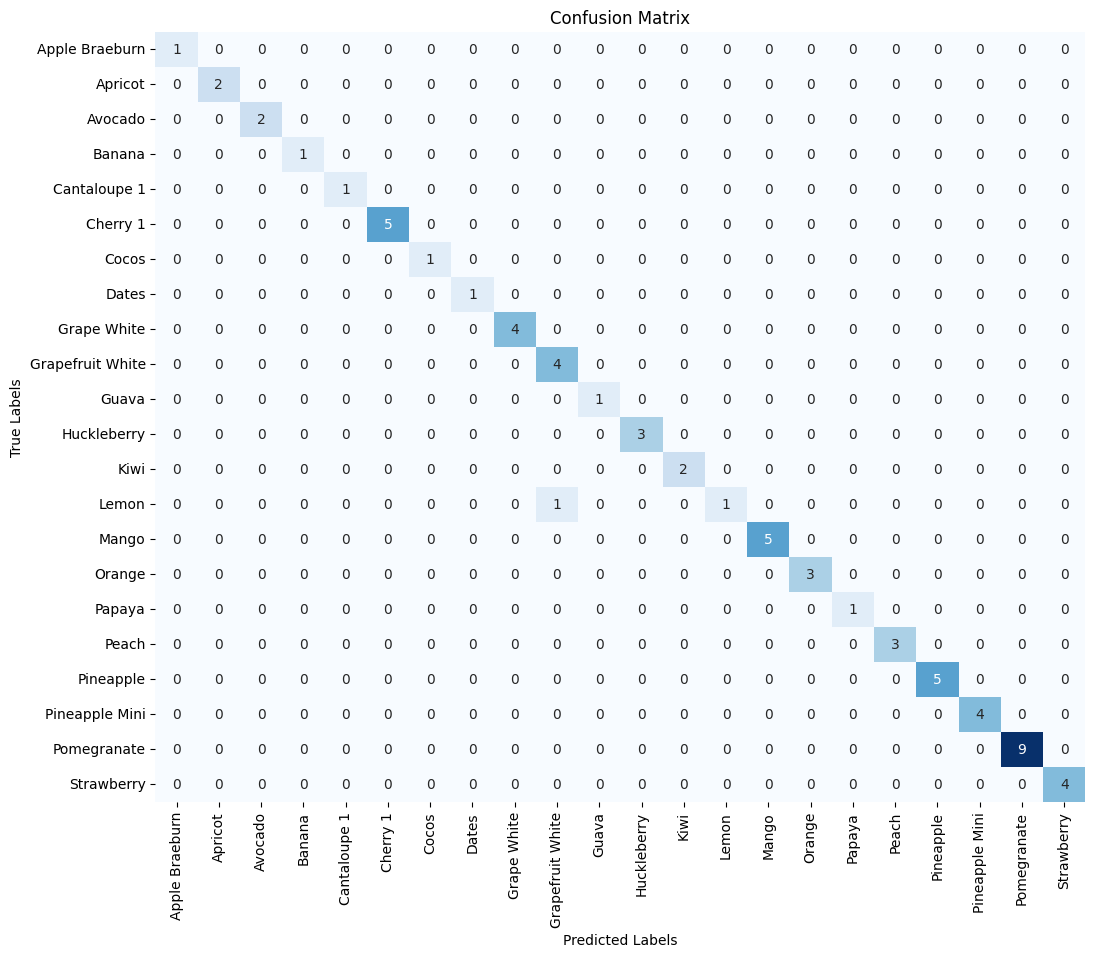

In [68]:
from sklearn.metrics import confusion_matrix

# Define a list of fruit names
fruit_names = ['Apple Braeburn', 'Apricot', 'Avocado', 'Banana', 'Cantaloupe 1', 'Cherry 1',
               'Cocos', 'Dates', 'Grape White', 'Grapefruit White', 'Guava', 'Huckleberry',
               'Kiwi', 'Lemon', 'Mango', 'Orange', 'Papaya', 'Peach', 'Pineapple',
               'Pineapple Mini', 'Pomegranate', 'Strawberry']

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=fruit_names, yticklabels=fruit_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()

In [69]:
print(conf_matrix)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0]
 [0 0 0 0 0 0